Q18 Embossフィルター

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

imori = cv2.imread("imori.jpg")

def show_gray(gray_img):
    plt.imshow(gray_img)
    plt.gray()
    plt.show()
    
def padding_0(src):
    return cv2.copyMakeBorder(src,1,1,1,1,cv2.BORDER_CONSTANT,(0,0,0))

def gray(gray_image):
    b = gray_image[:,:,0].copy()
    g = gray_image[:,:,1].copy()
    r = gray_image[:,:,2].copy()
    
    y = 0.2126*r + 0.7152*g + 0.0722*b
    y = y.astype(int)
    
    return y    

In [4]:
def emboss_filter(img):
    image = gray(img)
    pad_image = padding_0(image)
    h,w = image.shape
    K = np.array([ [-2, -1, 0],
                    [-1, 1, 1],
                    [0, 1, 2] ])
    
    for i in range(1,w):
        for j in range(1,h):
            pic_v = np.array(pad_image[i-1:i+2,j-1:j+2])*K
            image[i-1,j-1] = np.clip(pic_v.sum().astype(int), 0, 255)

    return image

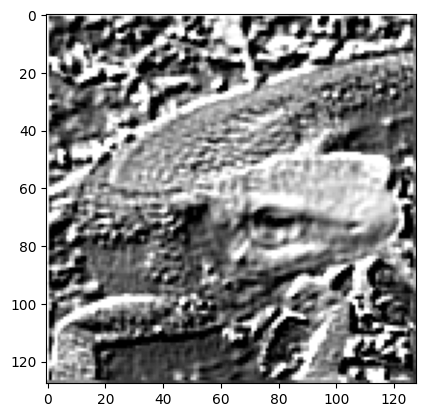

In [5]:
q18_img = emboss_filter(imori)
show_gray(q18_img)